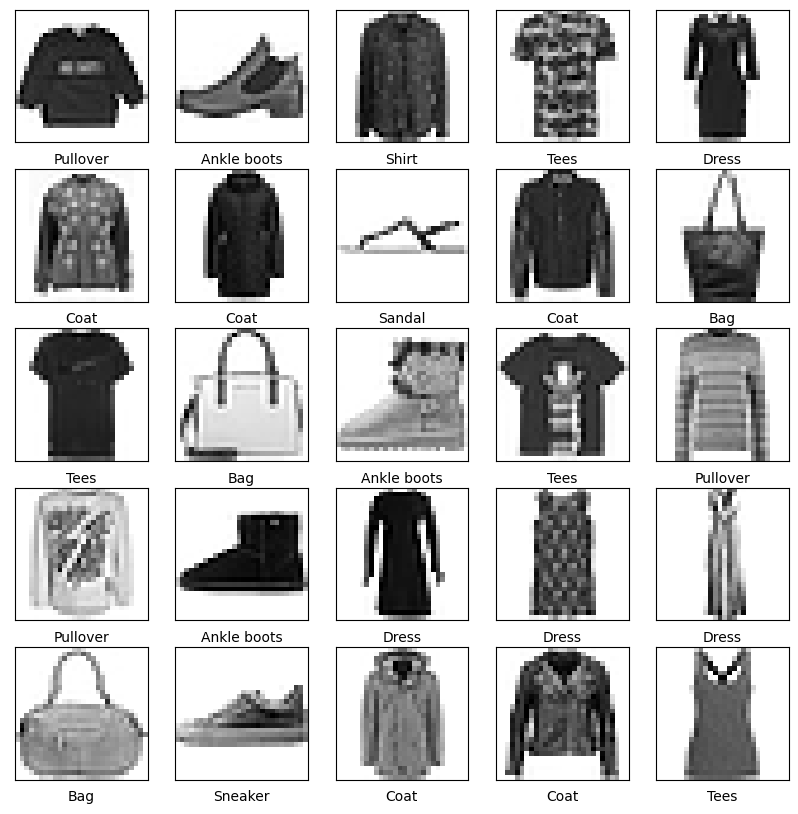

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and convert the training and test dataset. This will convert the csv to dataframe.
data_train = pd.read_csv('/Users/vikramkalta/Desktop/Assignment_AI/Fashion_MNIST_Data/fashion-mnist_train.csv')
data_test = pd.read_csv('/Users/vikramkalta/Desktop/Assignment_AI/Fashion_MNIST_Data/fashion-mnist_test.csv')
X_train = data_train.iloc[:, 1:].to_numpy()
y_train = data_train.iloc[:, 0]
labels = ['Tees', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots']
# Data cleanup
# Check the duplicates.
duplicates = data_train.duplicated().sum()
# Remove duplicates.
data_train.drop_duplicates(inplace=True)
# We want to check all the unique labels present in the data.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap="binary")
    plt.xlabel(labels[y_train[i]])

plt.show()

In [21]:
# Data preprocessing & pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn import tree
import graphviz
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

xx = X_train[0:60000]
yy = y_train[0:60000]
# We need to create a normalizer instance using MinMaxScaler object.
normalize = MinMaxScaler()

start = 7
end = 13

# This will create different models for different values of k, in order to find the optimal
# value of k using elbow graph
test_error_rate = []
train_error_rate = []
for k in range(start, end):
#     dt = tree.DecisionTreeClassifier(max_depth=k)
    pca = PCA(n_components=0.95) # keep 95% of variance
    # Train a decision tree classifier on the reduced data
    dt = DecisionTreeClassifier(max_depth=k)
    pipeline = [('dt', dt)]
    pipe = Pipeline(steps=pipeline)
    # We perform 5-fold cross validation.
#     cross_dict = cross_validate(pipe, xx, yy, cv=10, scoring='accuracy', return_train_score=True)
    cross_dict = cross_validate(pipe, pca.fit_transform(xx), yy, cv=10, scoring='accuracy', return_train_score=True)
    # capturing train and test error rate for elbow graph
    test_error_rate.append(cross_dict['test_score'].mean())
    train_error_rate.append(cross_dict['train_score'].mean())


print('loaded')
# # train_error_rate = [1 - acc for acc in train_error_rate]
test_error_rate = [1 - acc for acc in test_error_rate]
plt.title('Elbow Graph')
plt.xlabel('Depth')
plt.ylabel('error_rate')
sns.lineplot(x = range(start,end), y = test_error_rate, color = 'red')

# We train with max depth 11 since it has lowest error rate
# Perform PCA for dimensionality reduction
pca = PCA(n_components=0.95) # keep 95% of variance
X_train_reduced = pca.fit_transform(xx)
print(len(X_train_reduced[0]))
print(len(X_train_reduced))

# Train a decision tree classifier on the reduced data
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(X_train_reduced, yy)


loaded
187
60000


DecisionTreeClassifier(max_depth=11)

Accuracy: 0.7699
76.99


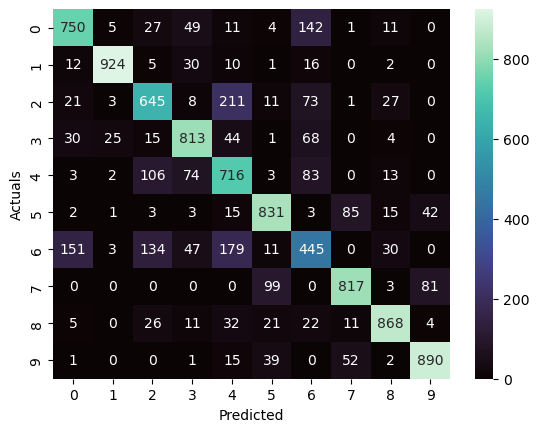

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Preprocessing of the test dataset
data_test.head()
# Check null values
data_test.isnull().sum().sum()
X_test = data_test.iloc[:, 1:].to_numpy()
y_test = data_test.iloc[:, 0]

# Reduce the test data using the same PCA model
X_test_reduced = pca.transform(X_test)

# Generate predictions for the test data
y_test_pred = clf.predict(X_test_reduced)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Normalize the test dataset
# X_test_norm = normalize.transform(X_test)
# dt = tree.DecisionTreeClassifier(max_depth=10)
# dt.fit(xx, yy)
# y_test_pred = dt.predict(X_test)
# print(y_test_pred)
# Now we evaluate the model using confusion matrix for this test dataset
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
# Get the accuracy score
test_accuracy = round(100 * accuracy_score(y_test, y_test_pred), 2)
print(test_accuracy)